In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [112]:
train=pd.read_excel('C:/Users/Simran Kumari/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [113]:
test=pd.read_excel('C:/Users/Simran Kumari/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')


In [114]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [115]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [116]:
train['source']='train'
test['source']='test'

In [117]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


In [118]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,test


In [119]:
#Price is having nan value as that will be predicted

In [120]:
#dropping na values in route and totalstop

In [121]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
source             0
dtype: int64

In [122]:
train=train.dropna(axis=0)

In [123]:
df=pd.concat([train,test],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13348,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13349,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13350,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13351,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [124]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

In [125]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [126]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [127]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [128]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

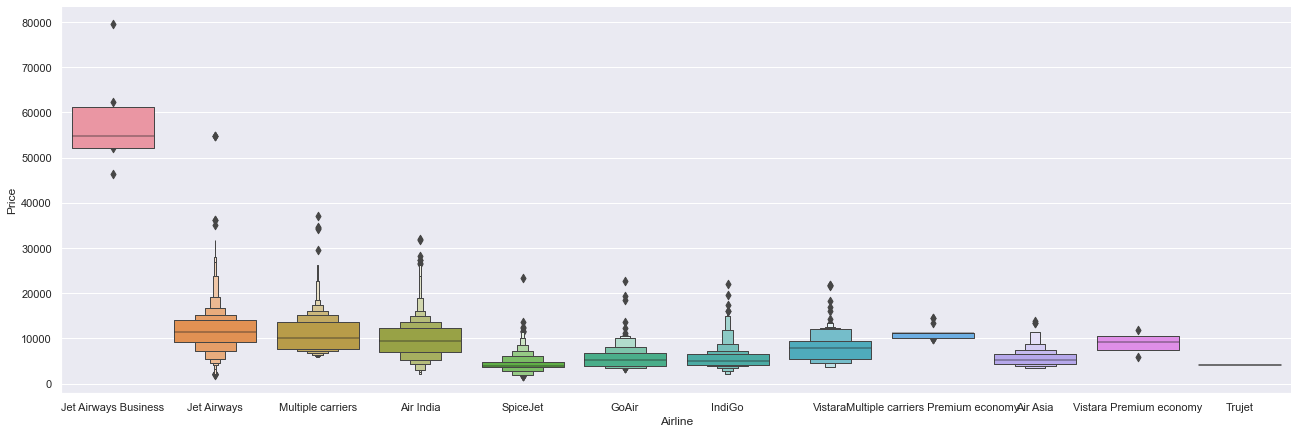

In [129]:
sns.set()
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

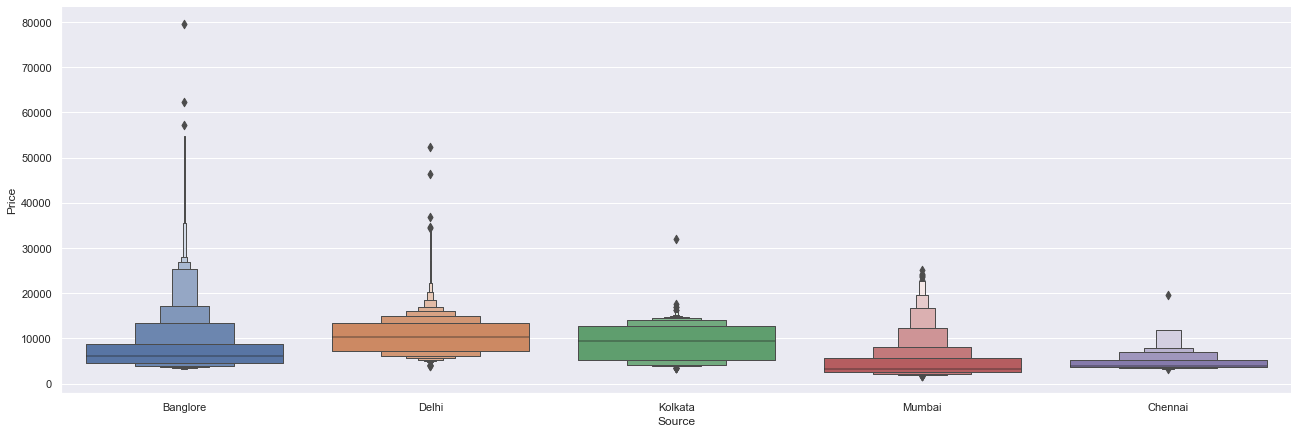

In [130]:
sns.set()
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

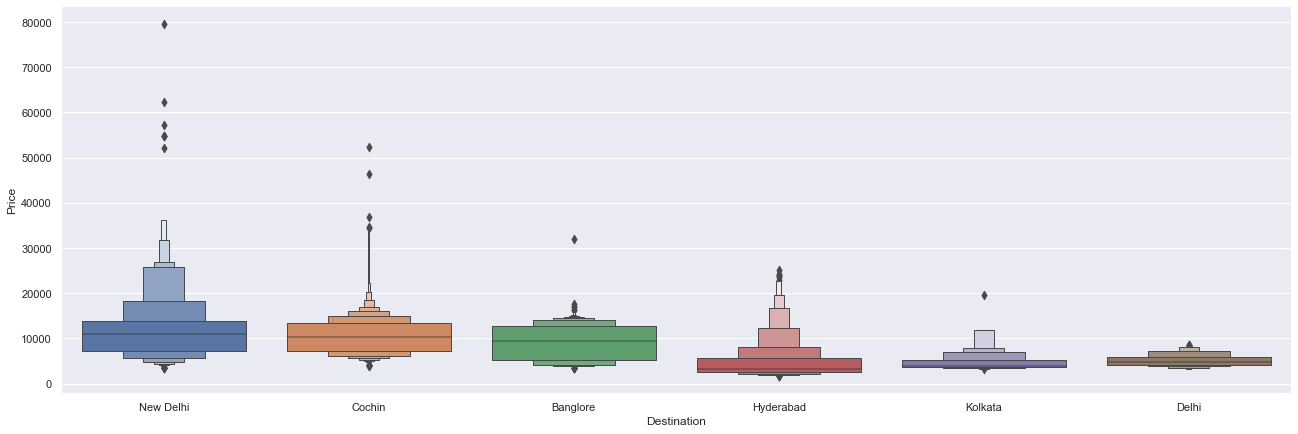

In [131]:
sns.set()
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [132]:
#Source and destination also have some impact on the price

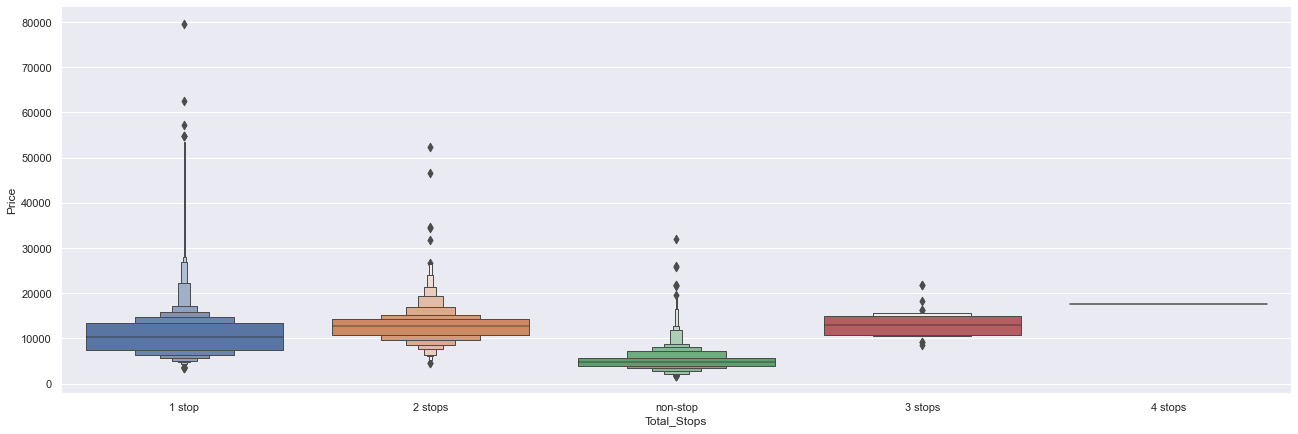

In [133]:
sns.set()
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [134]:
#No of stops also affect the price

In [135]:
#from above we have seen multiple outliers as well

In [136]:
#As we can see the name of the airline matters. ‘JetAirways Business’ has the highest price range. Other airlines price also varies.

In [137]:
#Route do not have much impact as we have no of stops

In [138]:
df.describe()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000
mean,9087.214567,13.390399,4.710552,12.513518,24.505729,13.396390,24.664120,10.233730,28.340822
std,4611.548810,8.439134,1.165662,5.736407,18.832255,6.896299,16.560343,8.473885,16.905763
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [139]:
#data is highly spread

In [140]:
df.skew()

Price             1.812405
Journey_day       0.135002
Journey_month    -0.390617
Dep_hour          0.108968
Dep_min           0.159560
Arrival_hour     -0.384718
Arrival_min       0.111711
Duration_hours    0.857694
Duration_mins    -0.093402
dtype: float64

In [141]:
#Data is a little skewed as well

In [142]:
df.drop(["Route"], axis = 1, inplace = True)

In [143]:
cat_cols=[]
con_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)
        print(df[i].value_counts())
    else:
        con_cols.append(i)

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64
Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64
No info                         10492
In-flight meal not included      2426
No check-in baggage inc

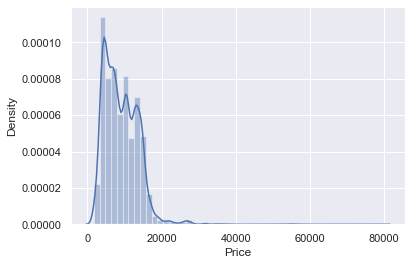

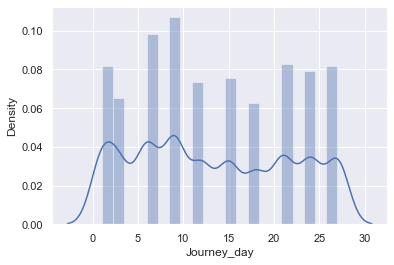

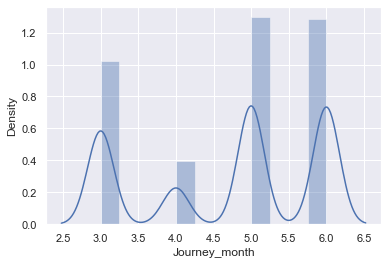

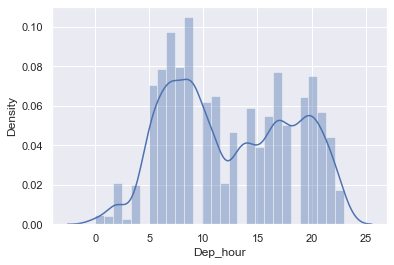

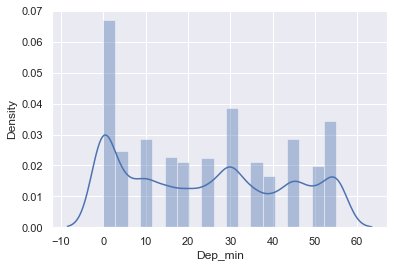

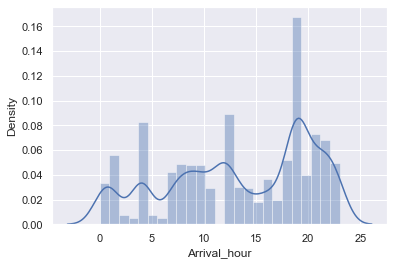

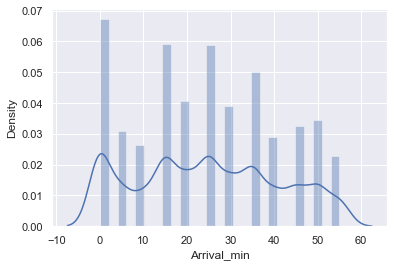

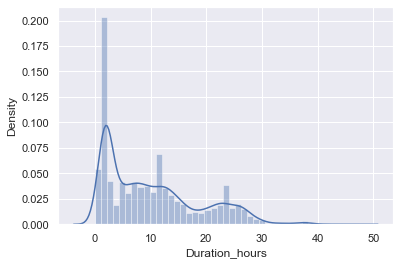

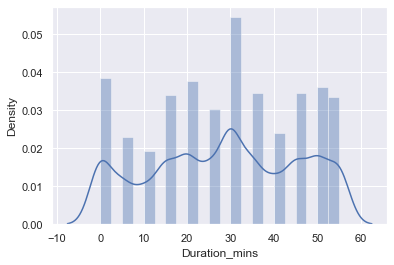

In [144]:
for i in con_cols:
    sns.distplot(df[i])
    plt.show()

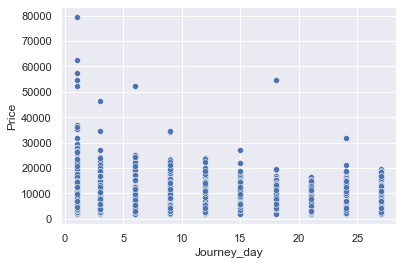

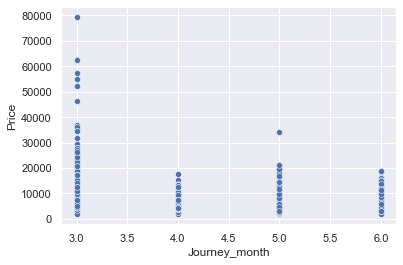

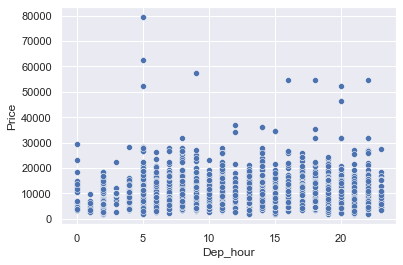

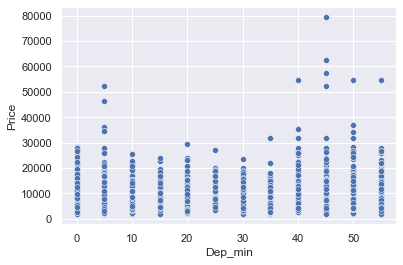

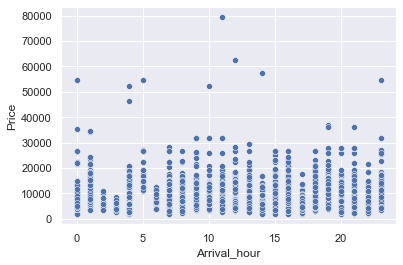

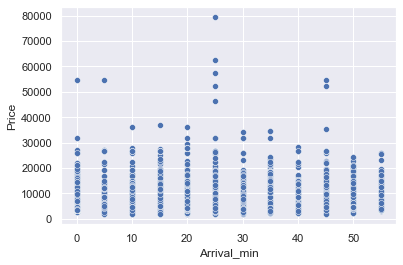

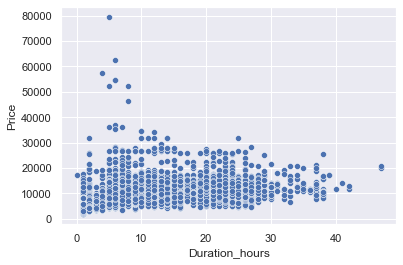

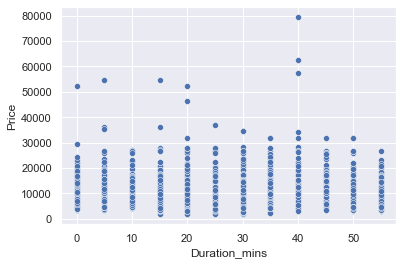

In [87]:
for i in con_cols[1:]:
    sns.scatterplot(x=df[i],y=df['Price'])
    plt.show()

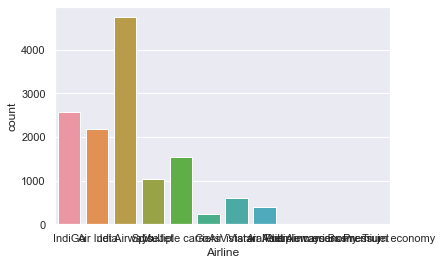

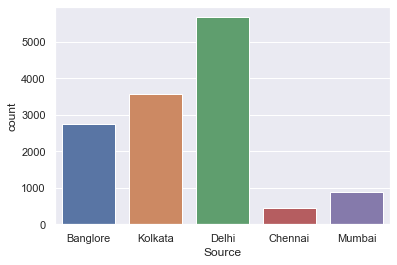

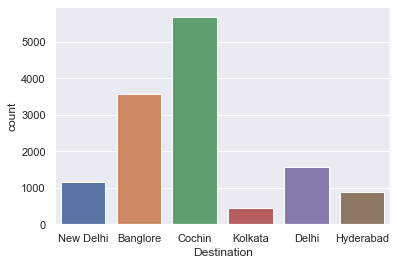

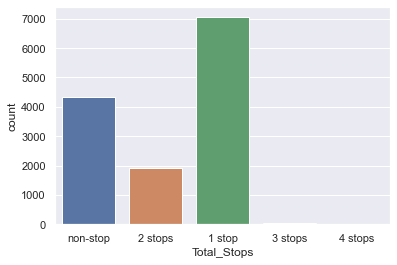

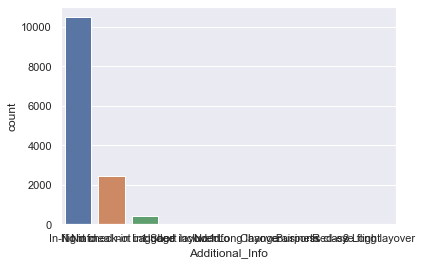

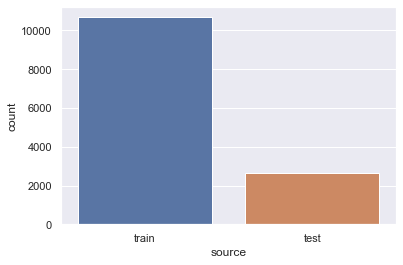

In [145]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

In [146]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [147]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')

In [148]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [149]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,7,3897.0,1,24,3,22,20,1,10,2,50
1,1,3,0,1,7,7662.0,1,1,5,5,50,13,15,7,25
2,4,2,1,1,7,13882.0,1,9,6,9,25,4,25,19,0
3,3,3,0,0,7,6218.0,1,12,5,18,5,23,30,5,25
4,3,0,5,0,7,13302.0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,1,3,0,0,7,NaN,0,6,6,20,30,20,25,23,55
13349,3,3,0,4,7,NaN,0,27,3,14,20,16,55,2,35
13350,4,2,1,0,7,NaN,0,6,3,21,50,4,25,6,35
13351,1,2,1,0,7,NaN,0,6,3,4,0,19,15,15,15


In [150]:
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.018545,0.022104,0.038171,-0.075951,-0.039565,-0.009394,0.020585,0.028954,-0.026187,-0.057729,-0.007892,-0.074004,-0.161390,-0.030299
Source,-0.018545,1.000000,-0.589711,-0.223097,-0.017174,0.015999,-0.003116,-0.002565,0.180685,0.058474,-0.058569,0.020768,0.015057,0.163609,-0.144416
Destination,0.022104,-0.589711,1.000000,0.336553,0.015037,-0.071122,0.000912,-0.035165,-0.362323,-0.068267,0.133038,-0.032660,0.021235,-0.256150,0.063226
Total_Stops,0.038171,-0.223097,0.336553,1.000000,0.143801,-0.571221,0.007884,0.033853,-0.023196,0.045725,0.049381,-0.096057,0.180089,-0.603818,0.180256
Additional_Info,-0.075951,-0.017174,0.015037,0.143801,1.000000,-0.063753,-0.025106,-0.015171,-0.038745,-0.052138,-0.019149,0.027466,0.038327,-0.151592,0.044092
Price,-0.039565,0.015999,-0.071122,-0.571221,-0.063753,1.000000,NaN,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
source,-0.009394,-0.003116,0.000912,0.007884,-0.025106,NaN,1.000000,0.028125,-0.003391,-0.007846,-0.010242,-0.013689,0.003198,0.002636,-0.001680
Journey_day,0.020585,-0.002565,-0.035165,0.033853,-0.015171,-0.153774,0.028125,1.000000,-0.035480,-0.003011,-0.008918,0.000940,-0.014630,-0.022642,-0.003691
Journey_month,0.028954,0.180685,-0.362323,-0.023196,-0.038745,-0.103643,-0.003391,-0.035480,1.000000,0.034506,-0.069431,-0.003214,-0.110277,0.009731,-0.044496
Dep_hour,-0.026187,0.058474,-0.068267,0.045725,-0.052138,0.006799,-0.007846,-0.003011,0.034506,1.000000,-0.026626,0.004267,0.067647,-0.001590,-0.023522


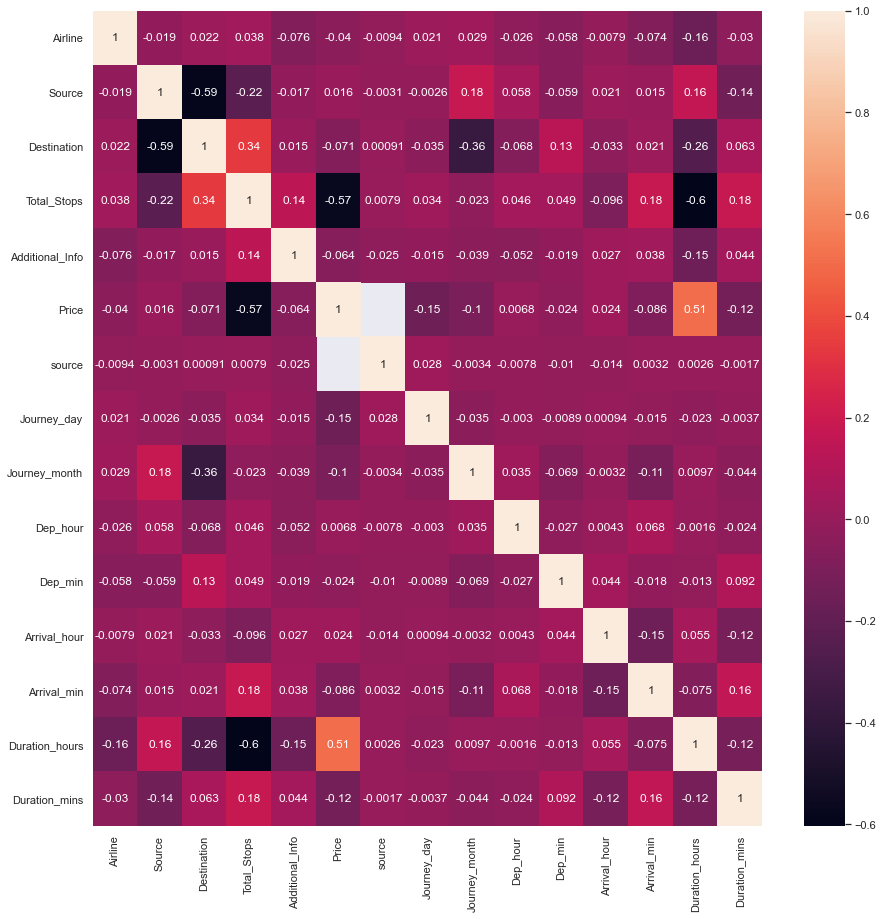

In [151]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

SPLIT

In [152]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,7,3897.0,1,24,3,22,20,1,10,2,50
1,1,3,0,1,7,7662.0,1,1,5,5,50,13,15,7,25
2,4,2,1,1,7,13882.0,1,9,6,9,25,4,25,19,0
3,3,3,0,0,7,6218.0,1,12,5,18,5,23,30,5,25
4,3,0,5,0,7,13302.0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,1,3,0,0,7,NaN,0,6,6,20,30,20,25,23,55
13349,3,3,0,4,7,NaN,0,27,3,14,20,16,55,2,35
13350,4,2,1,0,7,NaN,0,6,3,21,50,4,25,6,35
13351,1,2,1,0,7,NaN,0,6,3,4,0,19,15,15,15


In [153]:
df_train=df.loc[df["source"]==1]
df_test=df.loc[df["source"]==0]
df_test.reset_index(drop=True,inplace=True)

In [154]:
#Lets drop the Price from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Price"],inplace=True)

In [155]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [156]:
#seprating input and output from df_train
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [158]:
print(x.shape,y.shape)

(10682, 13) (10682, 1)


In [159]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [160]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [167]:
def fun(f):
    f.fit(x,y)
    pred=f.predict(x)
    print("MSE=",mean_squared_error(y,pred))
    print("r2 score=",r2_score(y,pred))

In [178]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='r2')
    print("Cross val score",score)
    print(score.mean())

In [163]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [165]:
lr=LinearRegression()
lr_params={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None,1,2,3]}
hypertuning(lr_params,lr)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [173]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
fun(lr)
cvs(lr)

MSE= 12258427.303241747
r2 score= 0.42352325177198025
Cross val score [0.44627111 0.40663133 0.44806198 0.40235407 0.41133323]
0.42293034374580296


In [182]:
r2=[42.35]
CVS=[42.29]
model=['Linear regression']

In [176]:
l=Lasso()
params_lasso={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_lasso,l)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [180]:
l=Lasso(alpha=0.1,copy_X=True,fit_intercept=True,normalize=True)
fun(l)
cvs(l)

MSE= 12259730.653470844
r2 score= 0.4234619591539889
Cross val score [0.44075234 0.41209009 0.42556433 0.42500756 0.40592818]
0.42186850144336036


In [183]:
CVS.append(42.35)
r2.append(42.19)
model.append('Lasso')

In [184]:
R=Ridge()
params_ridge={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_ridge,R)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [185]:
R=Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True)
fun(R)
cvs(R)

MSE= 12258434.764747068
r2 score= 0.4235229008799597
Cross val score [0.43044511 0.46665726 0.41715922 0.4344592  0.37371214]
0.42448658663473193


In [186]:
CVS.append(42.45)
r2.append(42.35)
model.append('Ridge')

In [187]:
en=ElasticNet()
params_en={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_en,en)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [188]:
en=ElasticNet(alpha=0.01,copy_X=True,fit_intercept=True,normalize=False)
fun(en)
cvs(en)

MSE= 12258611.724395946
r2 score= 0.423514579003064
Cross val score [0.42191201 0.39165984 0.44126897 0.45729806 0.40052109]
0.42253199205163067


In [189]:
CVS.append(42.25)
r2.append(42.35)
model.append('Elastic Net')

In [190]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
params_dtr={'criterion':['mse','friedman_mse','mae'],'splitter':['random','best'],'max_depth':[10,12,15],'min_samples_split':[5,10,15]}
hypertuning(params_dtr,dtr)

{'criterion': 'mse', 'max_depth': 15, 'min_samples_split': 15, 'splitter': 'random'}


In [195]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_split=15,splitter='random')
fun(dtr)
cvs(dtr)

MSE= 1811226.083163528
r2 score= 0.9148235171691427
Cross val score [0.84695944 0.75066167 0.88575608 0.81572347 0.82893801]
0.825607737091809


In [196]:
r2.append(91.48)
CVS.append(82.56)
model.append('Decision Tree')

In [197]:
from sklearn.svm import SVR
params_svr={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svr,SVR())

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': True}


In [198]:
svr=SVR(degree=1,gamma='auto',kernel='linear',shrinking=True)

In [199]:
fun(svr)
cvs(svr)

MSE= 13274447.262559684
r2 score= 0.37574290705129354
Cross val score [0.34888086 0.32507472 0.42415124 0.39059212 0.3541704 ]
0.368573867835624


In [200]:
CVS.append(36.86)
r2.append(37.57)
model.append('SVR')

In [201]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [203]:
knn=KNeighborsRegressor(algorithm='brute',leaf_size=30,n_neighbors=5,weights='distance')
fun(knn)
cvs(knn)

MSE= 84008.03846501904
r2 score= 0.9960493561171161
Cross val score [0.76351095 0.77320032 0.83834933 0.78813624 0.77270045]
0.7871794595611398


In [204]:
CVS.append(78.71)
r2.append(99.60)
model.append('K Neighbors')

In [205]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
rf=RandomForestRegressor()
etr=ExtraTreeRegressor()
ada=AdaBoostRegressor()
Gd=GradientBoostingRegressor()
HGd=HistGradientBoostingRegressor()

In [207]:
#hypertuning rf was taking forever
fun(rf)
cvs(rf)

MSE= 403452.22095150664
r2 score= 0.9810268626924116
Cross val score [0.88517904 0.89844602 0.8601647  0.86827028 0.89895482]
0.8822029705909301


In [208]:
r2.append(98.10)
CVS.append(88.22)
model.append('Random Forest')

In [209]:
params_etr={'criterion':['mse','friedman_mse','mae'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etr,etr)

{'criterion': 'mse', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'random'}


In [210]:
etr=ExtraTreeRegressor(criterion='mse',max_depth=None,min_samples_split=2,splitter='random')
fun(etr)
cvs(etr)

MSE= 103881.19127348188
r2 score= 0.995114781866712
Cross val score [0.71399735 0.83269659 0.70838237 0.82017209 0.76074407]
0.7671984963456643


In [211]:
r2.append(99.51)
CVS.append(76.72)
model.append('Extra Tree Regressor')

In [212]:
params_ada={'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'loss':['linear', 'square', 'exponential'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'learning_rate': 0.9, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 43}


In [214]:
ada=AdaBoostRegressor(learning_rate=0.9,loss='exponential',n_estimators=10,random_state=43)
fun(ada)
cvs(ada)

MSE= 8970388.008980067
r2 score= 0.5781497918258309
Cross val score [0.5135267  0.58710302 0.5888394  0.5581319  0.54092074]
0.5577043501208653


In [215]:
CVS.append(55.77)
r2.append(57.81)

In [216]:
model.append('Ada Boost')

In [219]:
#GradientBoost Hypertuning taking forever
fun(Gd)
cvs(Gd)

MSE= 3753019.516038606
r2 score= 0.8235068469125655
Cross val score [0.83407825 0.81924167 0.79786006 0.79027704 0.76509694]
0.8013107915030222


In [220]:
r2.append(82.35)
CVS.append(80.13)
model.append('Gradient Boost')

In [221]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
fun(xgb)
cvs(xgb)

MSE= 665414.8032318298
r2 score= 0.9687075550149544
Cross val score [0.88556283 0.92338849 0.89668656 0.86965665 0.88779804]
0.8926185134747167


In [222]:
r2.append(96.87)
CVS.append(89.26)
model.append('XGBRegressor')

In [223]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['r2']=r2
diff=[]
for i in range(0,len(r2)):
    diff.append(r2[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,r2,diff
0,Linear regression,42.29,42.35,0.06
1,Lasso,42.35,42.19,-0.16
2,Ridge,42.45,42.35,-0.10
3,Elastic Net,42.25,42.35,0.10
4,Decision Tree,82.56,91.48,8.92
5,SVR,36.86,37.57,0.71
6,K Neighbors,78.71,99.60,20.89
7,Random Forest,88.22,98.10,9.88
8,Extra Tree Regressor,76.72,99.51,22.79
9,Ada Boost,55.77,57.81,2.04


In [224]:
#From the above analysis Gradient Boost Regressor has least difference between r2 and cvs

In [225]:
import pickle
filename='Flight.pkl'
pickle.dump(Gd,open(filename,'wb'))

In [226]:
predict=rf.predict(df_test)

In [227]:
output=pd.DataFrame()
output['Predicted Price']=predict

In [228]:
output

,Predicted Price
0,17520.08
1,19109.33
2,16032.64
3,15446.70
4,15672.75
...,...
2666,19506.75
2667,18763.79
2668,17520.08
2669,17537.03


In [229]:
output.to_csv('Flight_Price_Prediction.csv')